# EDA-GLOBAL TERRORISM 
TASKS: ﬁnd out the hot zone of terrorism &
what all security issues and insights you can derive by EDA

# Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Import

In [19]:
data=pd.read_csv("globalterrorismdb_0718dist.csv", encoding= "latin1", low_memory= False)
data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [20]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

Rename the columns for convenience

In [21]:
data1=data[['Year','Month','Country','state','Region','city','AttackType','Killed',
               'Wounded','Target','Group','Target_type','Weapon_type','Motive']]
data1

,Year,Month,Country,state,Region,city,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive
0,1970,7,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,Greece,Attica,Western Europe,Athens,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,Japan,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,Armed Assault,1.0,2.0,Checkpoint,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,Syria,Lattakia,Middle East & North Africa,Jableh,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,Muslim extremists,Military,Explosives,NaN
181688,2017,12,Philippines,Maguindanao,Southeast Asia,Kubentog,Facility/Infrastructure Attack,0.0,0.0,Houses,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,India,Manipur,South Asia,Imphal,Bombing/Explosion,0.0,0.0,Office,Unknown,Government (General),Explosives,NaN


data1 contains the columns that are more likely to be used for the given tasks.


# Data Cleaning

In [22]:
data1.drop_duplicates()
data1

,Year,Month,Country,state,Region,city,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive
0,1970,7,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,Greece,Attica,Western Europe,Athens,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,Japan,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,Armed Assault,1.0,2.0,Checkpoint,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,Syria,Lattakia,Middle East & North Africa,Jableh,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,Muslim extremists,Military,Explosives,NaN
181688,2017,12,Philippines,Maguindanao,Southeast Asia,Kubentog,Facility/Infrastructure Attack,0.0,0.0,Houses,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,India,Manipur,South Asia,Imphal,Bombing/Explosion,0.0,0.0,Office,Unknown,Government (General),Explosives,NaN


In [6]:
data1.isnull().sum()

Year                0
Month               0
Country             0
state             421
Region              0
city              434
AttackType          0
Killed          10313
Wounded         16311
Target            636
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [23]:
data1['Motive'].fillna(value='NA', inplace=True) 
data1['city'].fillna(value='NA', inplace=True)
data1['Target'].fillna(value='NA', inplace=True)
data1["Killed"].fillna(data1["Killed"].mean(), inplace=True)
data1["Wounded"].fillna(data1["Wounded"].mean(), inplace=True)
data1['state'].fillna(value='NA', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [24]:
data1.isnull().sum()

Year           0
Month          0
Country        0
state          0
Region         0
city           0
AttackType     0
Killed         0
Wounded        0
Target         0
Group          0
Target_type    0
Weapon_type    0
Motive         0
dtype: int64

In [25]:
data1

,Year,Month,Country,state,Region,city,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive
0,1970,7,Dominican Republic,NA,Central America & Caribbean,Santo Domingo,Assassination,1.000000,0.000000,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NA
1,1970,0,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),0.000000,0.000000,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NA
2,1970,1,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,1.000000,0.000000,Employee,Unknown,Journalists & Media,Unknown,NA
3,1970,1,Greece,Attica,Western Europe,Athens,Bombing/Explosion,2.403272,3.167668,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NA
4,1970,1,Japan,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,2.403272,3.167668,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,Armed Assault,1.000000,2.000000,Checkpoint,Al-Shabaab,Military,Firearms,NA
181687,2017,12,Syria,Lattakia,Middle East & North Africa,Jableh,Bombing/Explosion,2.000000,7.000000,Hmeymim Air Base,Muslim extremists,Military,Explosives,NA
181688,2017,12,Philippines,Maguindanao,Southeast Asia,Kubentog,Facility/Infrastructure Attack,0.000000,0.000000,Houses,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NA
181689,2017,12,India,Manipur,South Asia,Imphal,Bombing/Explosion,0.000000,0.000000,Office,Unknown,Government (General),Explosives,NA


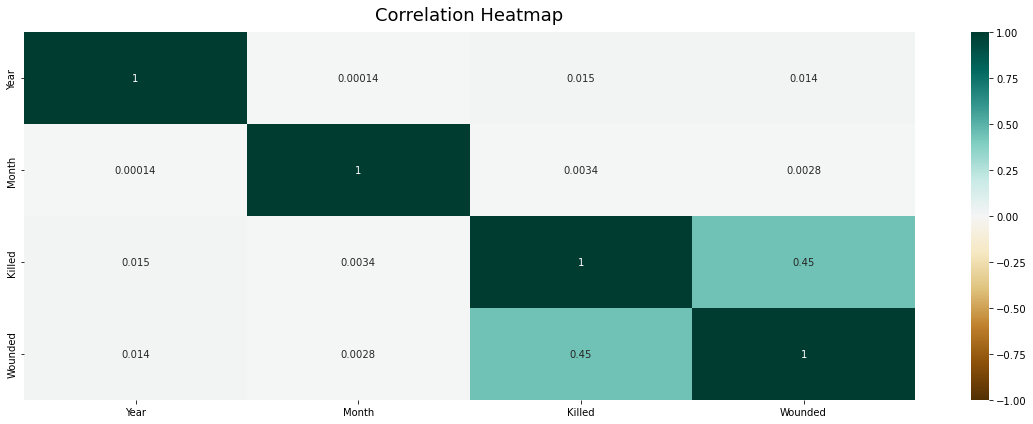

In [26]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(data1.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()

Plot a correlation graph between killed and wounded.

In [27]:
data1["Casualties"]=data1["Killed"]+data1["Wounded"]
data1

C:\Users\Taqdees\AppData\Local\Temp/ipykernel_8064/3832445215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Casualties"]=data1["Killed"]+data1["Wounded"]


,Year,Month,Country,state,Region,city,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive,Casualties
0,1970,7,Dominican Republic,NA,Central America & Caribbean,Santo Domingo,Assassination,1.000000,0.000000,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NA,1.000000
1,1970,0,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),0.000000,0.000000,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NA,0.000000
2,1970,1,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,1.000000,0.000000,Employee,Unknown,Journalists & Media,Unknown,NA,1.000000
3,1970,1,Greece,Attica,Western Europe,Athens,Bombing/Explosion,2.403272,3.167668,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NA,5.570941
4,1970,1,Japan,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,2.403272,3.167668,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NA,5.570941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,Armed Assault,1.000000,2.000000,Checkpoint,Al-Shabaab,Military,Firearms,NA,3.000000
181687,2017,12,Syria,Lattakia,Middle East & North Africa,Jableh,Bombing/Explosion,2.000000,7.000000,Hmeymim Air Base,Muslim extremists,Military,Explosives,NA,9.000000
181688,2017,12,Philippines,Maguindanao,Southeast Asia,Kubentog,Facility/Infrastructure Attack,0.000000,0.000000,Houses,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NA,0.000000
181689,2017,12,India,Manipur,South Asia,Imphal,Bombing/Explosion,0.000000,0.000000,Office,Unknown,Government (General),Explosives,NA,0.000000


A new column named "Casualties" is added to calculate killed and wounded as a whole column.

# Save Jupyter file into csv file 

In [28]:
data2=data1.to_csv("data2.csv", index=False)
data2`

data2 contains the require data to use for analysis to find the solution of given tasks.